In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
from pathlib import Path
from scipy import stats

In [5]:
data_path = Path("../Titanic_data/train.csv")
df = pd.read_csv(data_path)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

The age and Cabine variables contain a large amount of missing data, we will therefore exclude them when constructing our model.

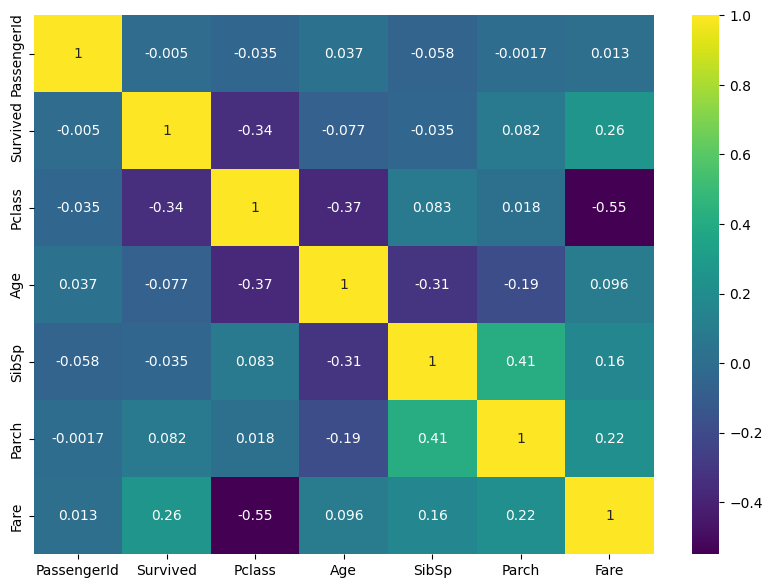

In [11]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

Pclass and Fare seem to be mildly correlated.
The same goes for SibSp and Parch.

<Figure size 1000x400 with 0 Axes>

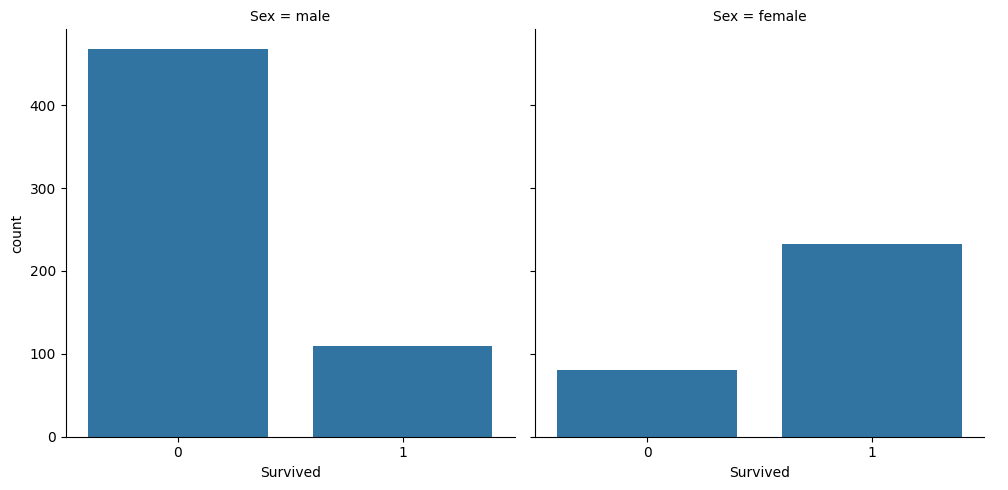

In [19]:
plt.figure(figsize=(10, 4))
sns.catplot(data=df, x='Survived', kind='count', col='Sex')
plt.show()

Is there a significant difference in the survival rate according to gender ? 

In [22]:
male_survivors = df[df.Sex == 'male']['Survived']
female_survivors = df[df.Sex == 'female']['Survived']

t_stat, p_val = stats.ttest_ind(female_survivors, male_survivors, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print('There is a significant difference in the survival rate between the two sexes')

else:
    print('We fail to reject the null hypothesis as there is insufficient evidence to conclude that the survival rates are different')

T-statistic: 18.67183317725917
P-value: 2.2836009226010533e-61
There is a significant difference in the survival rate between the two sexes


<Figure size 1000x400 with 0 Axes>

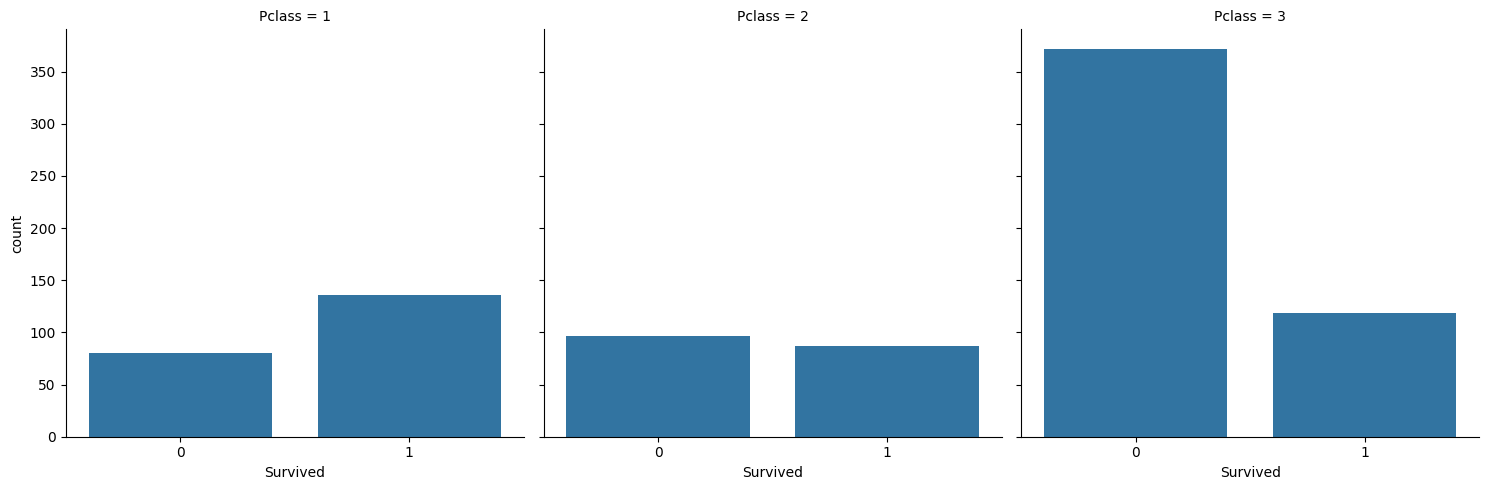

In [18]:
plt.figure(figsize = (10, 4))
sns.catplot(data=df, x='Survived', kind='count', col='Pclass')
plt.show()

Lets perform ANOVA to test if there is a significant difference in the survival rates between the 3 classes

In [30]:
class1 = df[df.Pclass == 1]['Survived']
class2 = df[df.Pclass == 2]['Survived']
class3 = df[df.Pclass == 3]['Survived']

print('Mean survival rate by class: ')
print(df.groupby('Pclass')['Survived'].mean())

print(len(class1), len(class2), len(class3))



f_stat, fp_val = stats.f_oneway(class1, class2, class3)
print("F-statistic:", f_stat)
print("P-value:", fp_val)

if fp_val < 0.05:
    print('We reject the null hypothesis and conclude there is a significant difference in the survival rate between the classes')
else:
    print('We fail to reject the null hypothesis as there is insufficent evidence to conclude there is a significant difference')

Mean survival rate by class: 
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
216 184 491
F-statistic: 57.964817590910116
P-value: 2.1832474151179777e-24
We reject the null hypothesis and conclude there is a significant difference in the survival rate between the classes


In [32]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Figure size 1000x400 with 0 Axes>

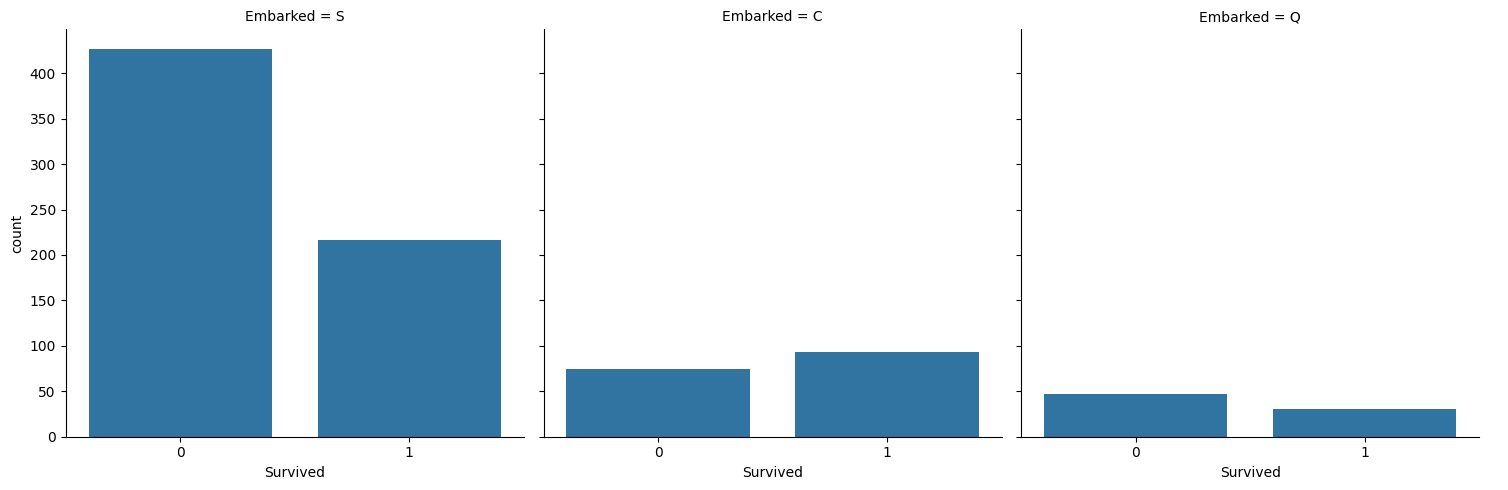

In [34]:
plt.figure(figsize = (10, 4))
sns.catplot(data=df, x='Survived', col='Embarked', kind='count')
plt.show()

Did the port of embarkment have a significant effect on survival ? 

In [36]:
port_s = df[df.Embarked == 'S']['Survived']
port_c = df[df.Embarked == 'C']['Survived']
port_q = df[df.Embarked == 'Q']['Survived']

print('Mean survival rate per port:')
print(df.groupby('Embarked')['Survived'].mean())

print('----------------------------------------')

f_stat, p_val = stats.f_oneway(port_s, port_c, port_q)

if p_val < 0.05:
    print('There is a significant difference in the survival rate between the ports')
else:
    print('There is no significant difference in the survival rate between the ports')


Mean survival rate per port:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64
----------------------------------------
There is a significant difference in the survival rate between the ports


How are the age distributions for survivors and non survivors ? 

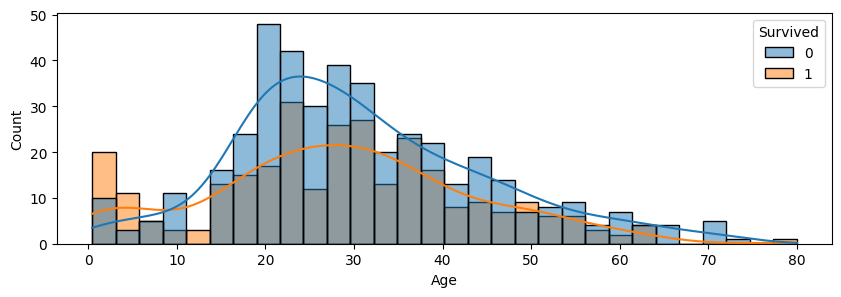

In [39]:
plt.figure(figsize = (10, 3))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.show()

Is there a significant difference between the mean age of survivors and non survivors ? 

In [43]:
age_survived = df[df.Survived==1]['Age'].dropna()
age_non_survived = df[df.Survived==0]['Age'].dropna()

t_stat, p_val = stats.ttest_ind(age_survived, age_non_survived, equal_var=False)  # Welch’s t-test
print("T-statistic:", t_stat)
print("P-value:", p_val)


if p_val < 0.05:
    print('There is a significant difference in the age between survivors and non-survivors')

else:
    print('There is no significant difference in the age of survivors and non-survivors')




T-statistic: -2.0460301043939704
P-value: 0.04118965162586638
There is a significant difference in the age between survivors and non-survivors


How is the fare distributions for Survivors and non survivors ? 

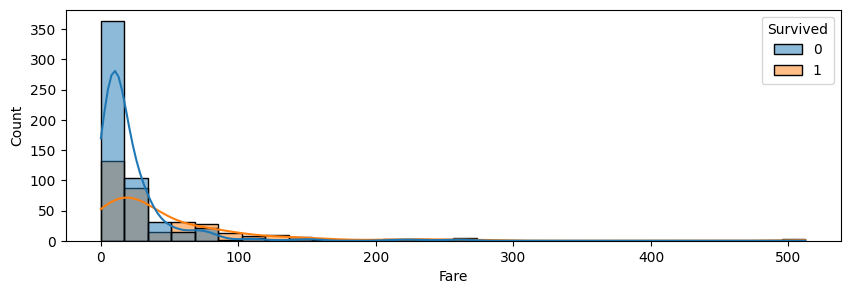

In [48]:
plt.figure(figsize = (10, 3))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=30)
plt.show()

<Axes: xlabel='Fare'>

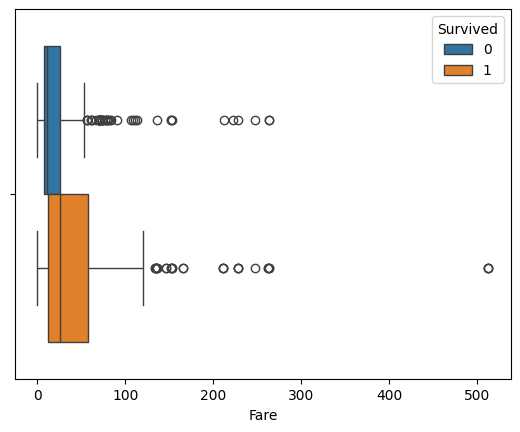

In [47]:
sns.boxplot(data=df, x='Fare', hue='Survived')

Since the data is severely skewed, we will perform a Man-whitney U test to see if there is a significant difference in the fares of survivors and non survivors

In [50]:

# Drop missing fares
fare_survived = df[df.Survived == 1]['Fare'].dropna()
fare_non_survived = df[df.Survived == 0]['Fare'].dropna()

# Mann-Whitney U test
u_stat, p_val = stats.mannwhitneyu(fare_survived, fare_non_survived, alternative='two-sided')

print("U-statistic:", u_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("There is a significant difference in fares between survivors and non-survivors")
else:
    print("No significant difference in fares between survivors and non-survivors")


U-statistic: 129951.5
P-value: 4.553477179250237e-22
There is a significant difference in fares between survivors and non-survivors
